In [28]:
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

prop_cycle = plt.rcParams['axes.prop_cycle']

In [29]:
import sys
sys.path.append('../functions/')
from functions import nanaverage, nanstd

# Figures 1 and 2

In [30]:
def import_scenario_AMOC(scenario, list_models_to_remove=[]):
    if scenario in ["ssp126", "ssp245", "ssp585"]:
        name_samples = np.load("../data/multiruns/name_samples_{}.npy".format(scenario))
    elif scenario in ["historical", "ssp119", "ssp370"]:
        name_run_per_sample   = np.load("../data/multiruns/{}_AMOC/name_run_per_model.npy".format(scenario))
        name_model_per_sample = np.load("../data/multiruns/{}_AMOC/name_model_per_model.npy".format(scenario))
        name_samples          = []
        for id_sample in range(len(name_run_per_sample)):
            name_samples.append(name_model_per_sample[id_sample]+'_'+name_run_per_sample[id_sample])
    else:
        raise NameError("{} inconnu".format(scenario))

        
    metric                = "AMOC"
    times                 = np.load("../data/multiruns/"+scenario+"_"+metric+"/times.npy").astype(str).astype(int)
    name_model_per_sample = np.load("../data/multiruns/"+scenario+"_"+metric+"/name_model_per_model.npy")
    name_run_per_sample   = np.load("../data/multiruns/"+scenario+"_"+metric+"/name_run_per_model.npy")
    nb_times              = len(times)
    nb_samples            = len(name_model_per_sample)
    full_name_samples     = [name_model_per_sample[id_sample]+"_"+name_run_per_sample[id_sample] for id_sample in range(nb_samples)]
    AMOC = np.memmap("../data/multiruns/"+scenario+"_"+metric+"/data.dat", dtype='float32', mode='r+',
                                  shape=(nb_samples, nb_times))
    
    # Prise en compte des samples communs
    final_name_samples, id_samples_toget, _ = np.intersect1d(full_name_samples, name_samples, return_indices=True)
    AMOC = AMOC[id_samples_toget]
    name_models = name_model_per_sample[id_samples_toget]
    name_runs   = name_run_per_sample[id_samples_toget]
    
    times = times.astype('str').astype('int')
    
    return AMOC, times, name_models, name_runs, final_name_samples

In [31]:
def averagedRun_per_model(ssp_times, ssp_AMOC, ssp_name_samples, ssp_name_models):
    unique_models        = np.unique(ssp_name_models)
    ssp_AMOC_averagedRun = []
    for model in unique_models:
        ssp_AMOC_averagedRun.append(np.mean(ssp_AMOC[np.where(ssp_name_models==model)[0]], axis=0))
    return np.array(ssp_AMOC_averagedRun), unique_models

def singleRun_per_model(ssp_times, ssp_AMOC, ssp_name_samples, ssp_name_models):
    unique_models      = np.unique(ssp_name_models)
    ssp_AMOC_singleRun = []
    for model in unique_models:
        ssp_AMOC_singleRun.append(ssp_AMOC[np.where(ssp_name_models==model)[0][0]])
    return np.array(ssp_AMOC_singleRun), unique_models

In [32]:
hist_AMOC, hist_times, hist_name_models, hist_name_runs, hist_name_samples           = import_scenario_AMOC("historical")
ssp119_AMOC, ssp119_times, ssp119_name_models, ssp119_name_runs, ssp119_name_samples = import_scenario_AMOC("ssp119")
ssp126_AMOC, ssp126_times, ssp126_name_models, ssp126_name_runs, ssp126_name_samples = import_scenario_AMOC("ssp126")
ssp245_AMOC, ssp245_times, ssp245_name_models, ssp245_name_runs, ssp245_name_samples = import_scenario_AMOC("ssp245")
ssp370_AMOC, ssp370_times, ssp370_name_models, ssp370_name_runs, ssp370_name_samples = import_scenario_AMOC("ssp370")
ssp585_AMOC, ssp585_times, ssp585_name_models, ssp585_name_runs, ssp585_name_samples = import_scenario_AMOC("ssp585")

hist_AMOC_averagedRun, hist_unique_models     = averagedRun_per_model(hist_times, hist_AMOC, hist_name_samples, hist_name_models)
ssp119_AMOC_averagedRun, ssp119_unique_models = averagedRun_per_model(ssp119_times, ssp119_AMOC, ssp119_name_samples, ssp119_name_models)
ssp126_AMOC_averagedRun, ssp126_unique_models = averagedRun_per_model(ssp126_times, ssp126_AMOC, ssp126_name_samples, ssp126_name_models)
ssp245_AMOC_averagedRun, ssp245_unique_models = averagedRun_per_model(ssp245_times, ssp245_AMOC, ssp245_name_samples, ssp245_name_models)
ssp370_AMOC_averagedRun, ssp370_unique_models = averagedRun_per_model(ssp370_times, ssp370_AMOC, ssp370_name_samples, ssp370_name_models)
ssp585_AMOC_averagedRun, ssp585_unique_models = averagedRun_per_model(ssp585_times, ssp585_AMOC, ssp585_name_samples, ssp585_name_models)


hist_AMOC_singleRun, hist_unique_models     = singleRun_per_model(hist_times, hist_AMOC, hist_name_samples, hist_name_models)
ssp119_AMOC_singleRun, ssp119_unique_models = singleRun_per_model(ssp119_times, ssp119_AMOC, ssp119_name_samples, ssp119_name_models)
ssp126_AMOC_singleRun, ssp126_unique_models = singleRun_per_model(ssp126_times, ssp126_AMOC, ssp126_name_samples, ssp126_name_models)
ssp245_AMOC_singleRun, ssp245_unique_models = singleRun_per_model(ssp245_times, ssp245_AMOC, ssp245_name_samples, ssp245_name_models)
ssp370_AMOC_singleRun, ssp370_unique_models = singleRun_per_model(ssp370_times, ssp370_AMOC, ssp370_name_samples, ssp370_name_models)
ssp585_AMOC_singleRun, ssp585_unique_models = singleRun_per_model(ssp585_times, ssp585_AMOC, ssp585_name_samples, ssp585_name_models)



# Table S1

In [33]:
list_scenarios = ["hist", "ssp119", "ssp126", "ssp245", "ssp370", "ssp585"] # hist ??

list_name_models = []
for id_scenario in range(len(list_scenarios)):
    scenario = list_scenarios[id_scenario]
    list_name_models.append(globals()['{}_name_models'.format(scenario)])
list_models = reduce(np.union1d, list_name_models)

nb_samples_perModel_perScenario = np.zeros((len(list_models), len(list_scenarios)), dtype=int)
total_nb_models_perScenario     = np.zeros((len(list_scenarios)), dtype=int)
total_nb_samples_perScenario    = np.zeros((len(list_scenarios)), dtype=int)
for id_scenario in range(len(list_scenarios)):
    scenario = list_scenarios[id_scenario]
    name_models_perSample = globals()['{}_name_models'.format(scenario)]
    for id_model in range(len(list_models)):
        nb_samples = np.sum(name_models_perSample==list_models[id_model])
        nb_samples_perModel_perScenario[id_model, id_scenario] = nb_samples
        
    total_nb_models_perScenario[id_scenario] = len(np.unique(name_models_perSample))
    total_nb_samples_perScenario[id_scenario] = len(name_models_perSample)

In [34]:
data = np.concatenate((nb_samples_perModel_perScenario,
                       total_nb_models_perScenario.reshape(1,-1),
                       total_nb_samples_perScenario.reshape(1,-1)), axis=0)
rows = np.concatenate((list_models, ["Total models", "Total members"]))

pd.DataFrame(data, index=rows, columns=list_scenarios)

,hist,ssp119,ssp126,ssp245,ssp370,ssp585
ACCESS-CM2,3,0,3,3,3,3
ACCESS-ESM1-5,40,0,10,30,10,10
CAS-ESM2-0,4,0,0,2,0,2
CESM2,11,0,3,3,3,3
CESM2-FV2,3,0,0,0,0,0
CESM2-WACCM,3,0,1,3,1,3
CESM2-WACCM-FV2,3,0,0,0,0,0
CIESM,3,0,0,1,0,0
CMCC-CM2-HR4,1,0,0,0,0,0
CMCC-CM2-SR5,1,0,0,1,0,1


In [35]:
def compute_min_max(hist_times, ssp_times,
     hist_AMOC, ssp_AMOC,
     hist_name_samples, ssp_name_samples,
     hist_name_models, ssp_name_models):

    times_ref         = np.logical_and(hist_times>=1850, hist_times<=1900)
    times_future      = np.logical_and(ssp_times>=2091, ssp119_times<=2100)
    ref_per_sample    = np.nanmean(hist_AMOC[:, times_ref], axis=1)
    future_per_sample = np.nanmean(ssp_AMOC[:, times_future], axis=1)
    
    common_samples_ssp, id_samples_ssp_hist, id_samples_ssp =  np.intersect1d(
        hist_name_samples, ssp_name_samples, return_indices=True)
    unique_models         = np.unique(hist_name_models[id_samples_ssp_hist])
    ref_mean_per_model    = []
    future_mean_per_model = []
    for model in unique_models:
        ref_mean_per_model.append(np.mean(ref_per_sample[id_samples_ssp_hist][np.where(hist_name_models[id_samples_ssp_hist]==model)[0]]))
        future_mean_per_model.append(np.mean(future_per_sample[id_samples_ssp][np.where(ssp_name_models[id_samples_ssp]==model)[0]]))

    #print(future_mean_per_model-ref_mean_per_model)
    ref = np.mean(ref_mean_per_model)
    relative_ssp_mean_per_model = (np.array(future_mean_per_model) - np.array(ref_mean_per_model))/np.array(ref_mean_per_model)
    #print(np.sort(relative_ssp_mean_per_model))
    min_, max_ = np.nanmin(relative_ssp_mean_per_model), np.nanmax(relative_ssp_mean_per_model)

    print("{:.1f}% to {:.1f}% ({} modèles, {} samples)".format(100*max_, 100*min_, len(ref_mean_per_model), len(common_samples_ssp)))
    

In [36]:
compute_min_max(hist_times, ssp119_times,
     hist_AMOC, ssp119_AMOC,
     hist_name_samples, ssp119_name_samples,
     hist_name_models, ssp119_name_models)

compute_min_max(hist_times, ssp126_times,
     hist_AMOC, ssp126_AMOC,
     hist_name_samples, ssp126_name_samples,
     hist_name_models, ssp126_name_models)

compute_min_max(hist_times, ssp245_times,
     hist_AMOC, ssp245_AMOC,
     hist_name_samples, ssp245_name_samples,
     hist_name_models, ssp245_name_models)

compute_min_max(hist_times, ssp370_times,
     hist_AMOC, ssp370_AMOC,
     hist_name_samples, ssp370_name_samples,
     hist_name_models, ssp370_name_models)

compute_min_max(hist_times, ssp585_times,
     hist_AMOC, ssp585_AMOC,
     hist_name_samples, ssp585_name_samples,
     hist_name_models, ssp585_name_models)

6.0% to -43.0% (5 modèles, 60 samples)
-3.3% to -50.2% (18 modèles, 105 samples)
-11.2% to -72.5% (32 modèles, 200 samples)
-15.0% to -58.3% (18 modèles, 140 samples)
-20.8% to -65.4% (27 modèles, 119 samples)


In [37]:
#------------------------------------- AMOC obs
#AMOC_obs_times = np.load("../data/obs_AMOC/times.npy").astype('str').astype(int)
#AMOC_obs = np.memmap("../data/obs_AMOC"+"/data.dat", dtype='float32', mode='r+', shape=(1, len(AMOC_obs_times), 1))[0, :, 0]

path          = "../data/last_obs_AMOC/moc_transports.mat"
import scipy.io
mat = scipy.io.loadmat(path)

obs_AMOC_times_days = mat['JG'][0]
obs_AMOC_times_days = obs_AMOC_times_days.astype("datetime64[D]")-np.datetime64('1970-01-01')+np.datetime64('2004-04-01')
obs_AMOC_times_years = obs_AMOC_times_days.astype("datetime64[Y]")
AMOC_days = mat['MOC_mar_hc10'][0,:]

#np.linspace(np.datetime64('2004'), np.datetime64('2021'))

mean_AMOC_perYear = []
years_to_mean = np.arange(0,20).astype("datetime64[Y]")-np.datetime64('1970')+np.datetime64('2004')
for year in years_to_mean:
    id_days = obs_AMOC_times_years==year
    sub_AMOC_days = AMOC_days[id_days]
    sub_AMOC_days = sub_AMOC_days[sub_AMOC_days>-99999.]
    mean_AMOC_perYear.append(np.mean(sub_AMOC_days))
    
AMOC_obs_times  = years_to_mean.astype(str).astype(int)[1:]
AMOC_obs = np.array(mean_AMOC_perYear)[1:]

# Figure 2: uncertainty decomposition (a single run per model is considered)

In [38]:
# 0. Création des données
common_models = reduce(np.intersect1d, [hist_unique_models, ssp126_unique_models,
                                        ssp245_unique_models, ssp370_unique_models,
                                        ssp585_unique_models])
print(len(common_models))

_, _, id_models_hist   = np.intersect1d(common_models, hist_unique_models, return_indices=True)
_, _, id_models_ssp126 = np.intersect1d(common_models, ssp126_unique_models, return_indices=True)
_, _, id_models_ssp245 = np.intersect1d(common_models, ssp245_unique_models, return_indices=True)
_, _, id_models_ssp370 = np.intersect1d(common_models, ssp370_unique_models, return_indices=True)
_, _, id_models_ssp585 = np.intersect1d(common_models, ssp585_unique_models, return_indices=True)

X = np.stack((ssp126_AMOC_singleRun[id_models_ssp126], ssp245_AMOC_singleRun[id_models_ssp245],
          ssp370_AMOC_singleRun[id_models_ssp370], ssp585_AMOC_singleRun[id_models_ssp585]), axis=2)

(nb_models, nb_times, nb_scenarios) = X.shape

X = np.concatenate(( 
                np.stack([hist_AMOC_singleRun[id_models_hist] for id_scenario in range(nb_scenarios)], axis=2), X),
                axis=1)

X_times    = np.concatenate((hist_times, ssp245_times))
nb_times_X = len(X_times)

# Différentes coupures
X          = X[:, X_times>=1950]
X_times    = X_times[X_times>=1950]
nb_times_X = len(X_times)

17


In [39]:
# 1. Lissage par un polynome d'ordre 4
p = 4 + 1
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

times = (X_times-np.mean(X_times))/np.std(X_times)
A = np.zeros((p, len(X_times)))
for id_p in range(p):
    A[id_p] = times**id_p
    
X_res      = np.zeros(X.shape)
X_smoothed = np.zeros(X.shape)
for id_model in range(nb_models):
    for id_scenario in range(nb_scenarios):
        time_serie          = X[id_model, :, id_scenario]
        time_serie_smoothed = lr.fit(A.T, time_serie.reshape(-1,1)).predict(A.T)[:, 0]
        
        X_res[id_model, :, id_scenario]      = time_serie_smoothed - time_serie
        X_smoothed[id_model, :, id_scenario] = time_serie_smoothed

In [40]:
# Travail en anomalie
X_anomaly          = np.zeros((nb_models, nb_times_X, nb_scenarios))
X_smoothed_anomaly = np.zeros((nb_models, nb_times_X, nb_scenarios))
X_ref              = np.zeros((nb_models, nb_scenarios))


min_year = 1970
max_year = 2000
hist_times_int = hist_times.astype('str').astype('int')
indexes_years_to_keep = np.logical_and(hist_times_int>=min_year, hist_times_int<=max_year)

for id_model in range(nb_models):
    for id_scenario in range(nb_scenarios):
        name_model    = common_models[id_model]
        id_model_hist = np.where(hist_unique_models==name_model)[0][0]
        ref           = np.nanmean(hist_AMOC_singleRun[id_model_hist, indexes_years_to_keep])
        signal        = X_smoothed[id_model, :, id_scenario]
                
        X_ref[id_model, id_scenario]                 = ref
        X_smoothed_anomaly[id_model, :, id_scenario] = signal - ref
        X_anomaly[id_model, :, id_scenario]          = X[id_model, :, id_scenario] - ref

In [41]:
# 2. Pondération des modèles
W = np.ones(nb_models)
W /= np.sum(W)
def weighted_var(values, weights):
    average = numpy.average(values, weights=weights)
    variance = numpy.average((values-average)**2, weights=weights)
    return variance

In [42]:
# 3. Calcul des 3 trucs
#------ a. variabilité interne
internal_var      = np.sum(W*np.var(X_res, axis=(1,2)))

#------ b. Incertitude modèle
average           = np.average(X_smoothed_anomaly, weights=W, axis=0)
weighted_variance = np.average((X_smoothed_anomaly-average)**2, weights=W, axis=0)
model_uncertainty = np.mean(weighted_variance, axis=1)

#------ c. Incertitude scénario
scenario_uncertainty = np.var(np.average(X_smoothed, weights=W, axis=0), axis=1)

#------ d. Incertitude totale
total_uncertainty = internal_var + model_uncertainty + scenario_uncertainty

mode = 100*model_uncertainty/total_uncertainty
inte = 100*internal_var/total_uncertainty
scen = 100*scenario_uncertainty/total_uncertainty

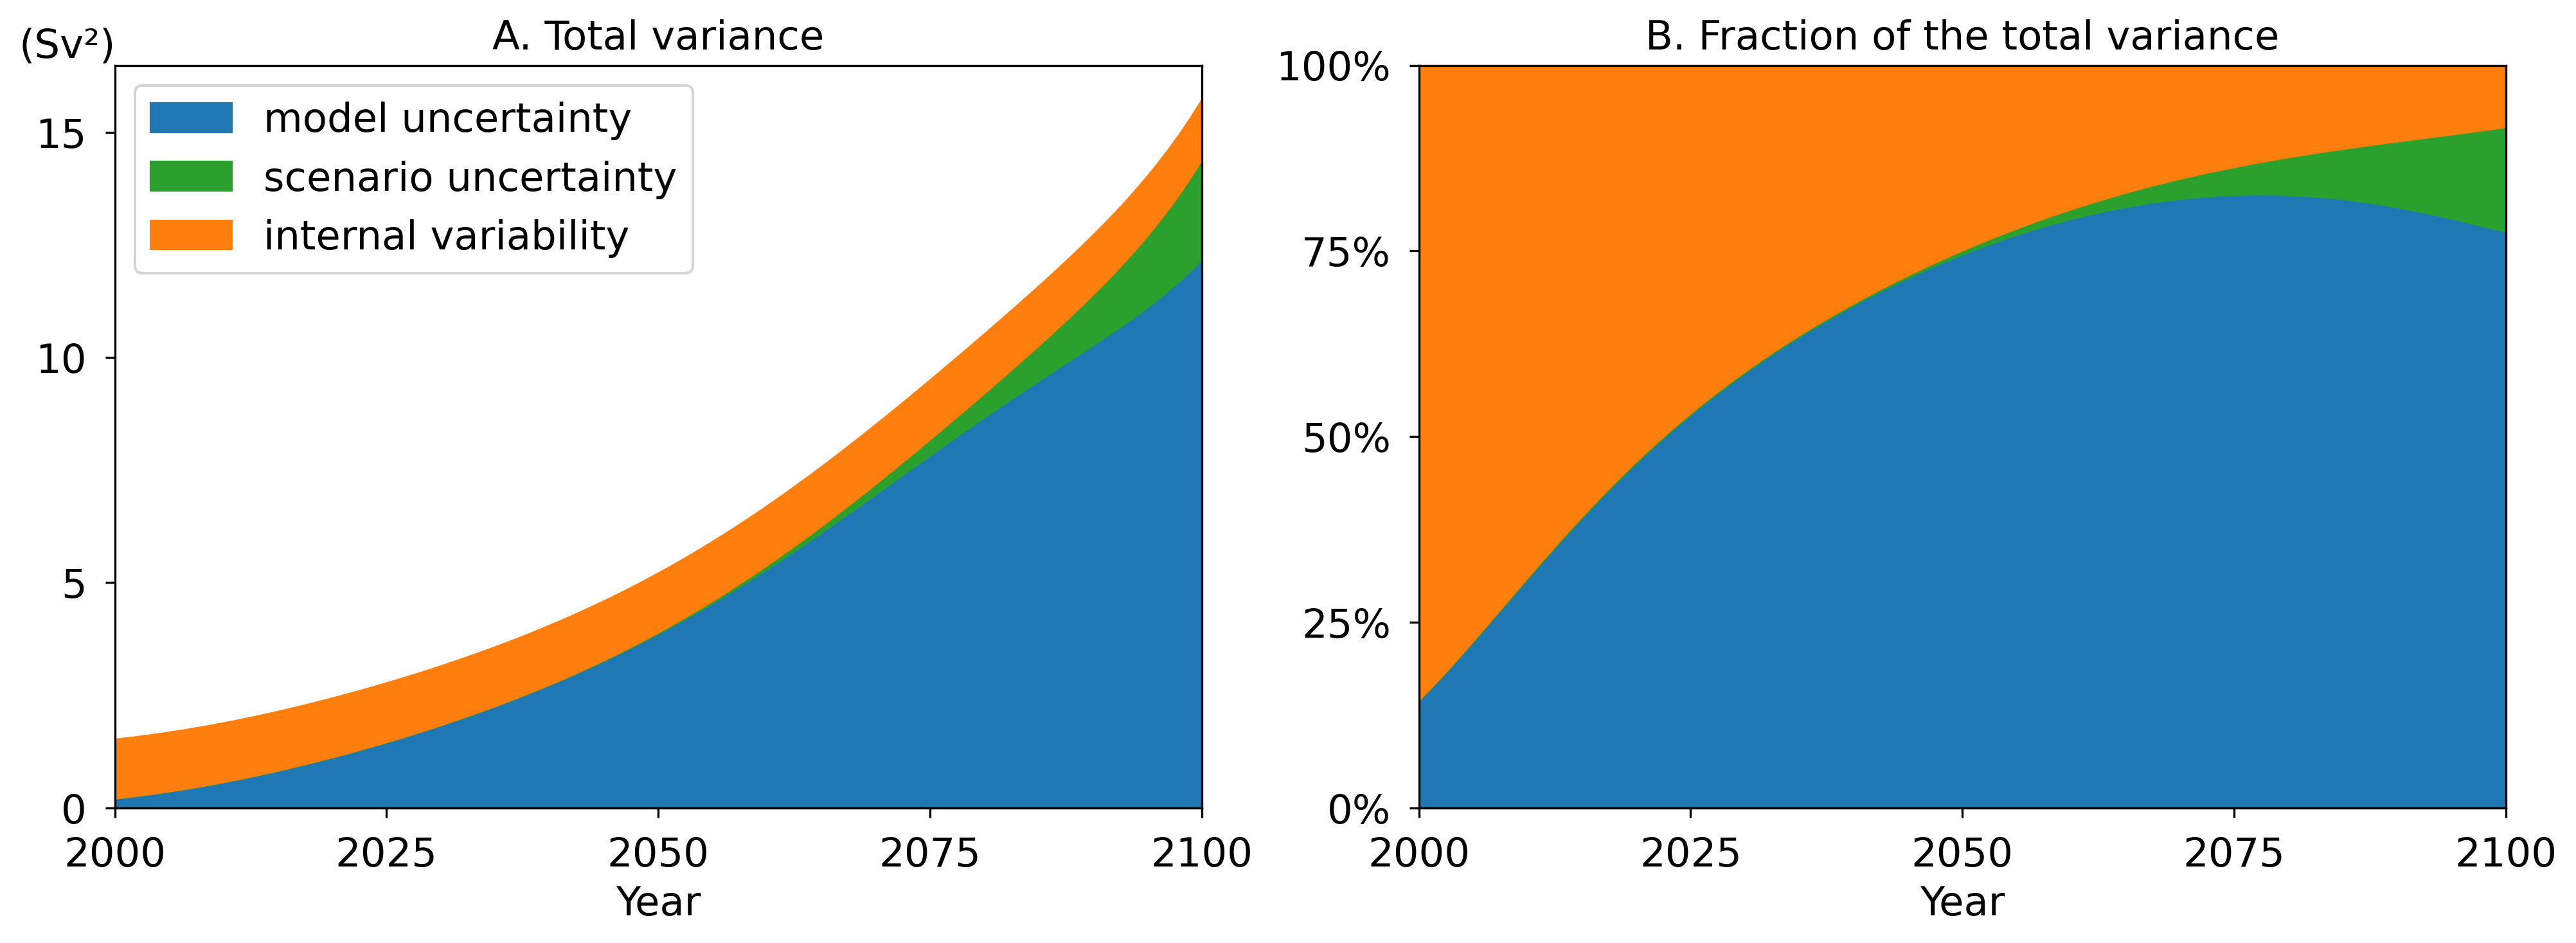

In [43]:
fontsize = 20
fontsize_labels = 15

colors = prop_cycle.by_key()['color']
plt.figure(figsize=(16,5), dpi=300)
plt.subplot(122)
plt.fill_between(X_times, 0, mode, color=colors[0], label="model uncertainty fraction")
plt.fill_between(X_times, mode, mode+scen, color=colors[2], label="scenario uncertainty fraction")
plt.fill_between(X_times, mode+scen, mode+scen+inte, color=colors[1], label="internal variability fraction")
plt.xlim(2000, 2100)
plt.ylim(0,100)
#plt.legend(loc='upper left', fontsize=fontsize_labels)
plt.xlabel("Year", fontsize=fontsize_labels)
plt.title("B. Fraction of the total variance", fontsize=fontsize_labels)
plt.xticks(ticks=[2000, 2025, 2050, 2075, 2100], labels=[2000, 2025, 2050, 2075, 2100], fontsize=fontsize_labels)
plt.yticks(ticks=[0,25,50,75,100], labels=["0%","25%","50%", "75%", "100%"], fontsize=fontsize_labels)
plt.tick_params(pad=7)
#plt.grid(axis='y', zorder=np.inf)

plt.subplot(121)
plt.fill_between(X_times, 0, model_uncertainty, color=colors[0], label="model uncertainty")
plt.fill_between(X_times, model_uncertainty, model_uncertainty+scenario_uncertainty, color=colors[2], label="scenario uncertainty")
plt.fill_between(X_times, model_uncertainty+scenario_uncertainty, model_uncertainty+scenario_uncertainty+internal_var,
                 color=colors[1], label="internal variability")
plt.xlim(2000, 2100)
plt.ylim(0)
plt.legend(loc='upper left', fontsize=fontsize_labels)
plt.xlabel("Year", fontsize=fontsize_labels)
plt.ylabel("(Sv²)", fontsize=fontsize_labels, rotation=0, loc='top', labelpad=-30)
plt.title("A. Total variance", fontsize=fontsize_labels)
#plt.suptitle("AMOC uncertainty decomposition", fontsize=fontsize)
plt.xticks(ticks=[2000, 2025, 2050, 2075, 2100], labels=[2000, 2025, 2050, 2075, 2100],
           fontsize=fontsize_labels)
plt.yticks(ticks=[0,5,10,15], labels=[0,5,10,15], fontsize=fontsize_labels)
plt.tick_params(pad=7)
#plt.grid(axis='y', zorder=np.inf)
plt.show()


In [44]:
print("Uncertainty in 2100:\n\tmodel: {:.0f}%\n\tscenario: {:.0f}%\n\tinternal variability: {:.0f}%".format(
    mode[-1], scen[-1], inte[-1]))

Uncertainty in 2100:
	model: 78%
	scenario: 14%
	internal variability: 8%


# Figure 1: AMOC timeseries (the mean run per model is considered)

In [45]:
def compute_anomaly(scenar_AMOC, scenar_models, hist_models, ref_AMOC):
    scenar_AMOC_anomaly = np.zeros(scenar_AMOC.shape)
    
    for id_model in range(len(scenar_models)):
        model = scenar_models[id_model]
        id_model_hist = np.where(hist_models==model)[0][0]
        ref_scenar = ref_AMOC[id_model_hist]
    
        scenar_AMOC_anomaly[id_model] = scenar_AMOC[id_model] - ref_scenar

    return scenar_AMOC_anomaly

In [46]:
ref_min        = 2005
ref_max        = 2023
hist_times_int = hist_times.astype('str').astype('int')
hist_times_ref = np.logical_and(hist_times_int>=ref_min, hist_times_int<=ref_max)
ref_AMOC       = np.mean(hist_AMOC_averagedRun[:, hist_times_ref], axis=1)


hist_AMOC_anomaly   = compute_anomaly(hist_AMOC_averagedRun, hist_unique_models, hist_unique_models, ref_AMOC)
ssp119_AMOC_anomaly = compute_anomaly(ssp119_AMOC_averagedRun, ssp119_unique_models, hist_unique_models, ref_AMOC)
ssp126_AMOC_anomaly = compute_anomaly(ssp126_AMOC_averagedRun, ssp126_unique_models, hist_unique_models, ref_AMOC)
ssp245_AMOC_anomaly = compute_anomaly(ssp245_AMOC_averagedRun, ssp245_unique_models, hist_unique_models, ref_AMOC)
ssp370_AMOC_anomaly = compute_anomaly(ssp370_AMOC_averagedRun, ssp370_unique_models, hist_unique_models, ref_AMOC)
ssp585_AMOC_anomaly = compute_anomaly(ssp585_AMOC_averagedRun, ssp585_unique_models, hist_unique_models, ref_AMOC)


In [47]:
hist_AMOC_anomaly_mean = np.nanmean(hist_AMOC_anomaly, axis=0)
hist_AMOC_anomaly_std  = np.nanstd(hist_AMOC_anomaly, axis=0)
hist_nb_models = len(hist_AMOC)

hist_anomaly_down = hist_AMOC_anomaly_mean - 2*hist_AMOC_anomaly_std
hist_anomaly_up   = hist_AMOC_anomaly_mean + 2*hist_AMOC_anomaly_std

hist_AMOC_mean = np.nanmean(hist_AMOC_averagedRun, axis=0)
hist_AMOC_std  = np.nanstd(hist_AMOC_averagedRun, axis=0)

hist_down = hist_AMOC_mean - 2*hist_AMOC_std
hist_up   = hist_AMOC_mean + 2*hist_AMOC_std

In [48]:
ssp119_AMOC_mean = np.nanmean(ssp119_AMOC_averagedRun, axis=0)
ssp126_AMOC_mean = np.nanmean(ssp126_AMOC_averagedRun, axis=0)
ssp245_AMOC_mean = np.nanmean(ssp245_AMOC_averagedRun, axis=0)
ssp370_AMOC_mean = np.nanmean(ssp370_AMOC_averagedRun, axis=0)
ssp585_AMOC_mean = np.nanmean(ssp585_AMOC_averagedRun, axis=0)

ssp119_AMOC_anomaly_mean = np.nanmean(ssp119_AMOC_anomaly, axis=0)
ssp126_AMOC_anomaly_mean = np.nanmean(ssp126_AMOC_anomaly, axis=0)
ssp245_AMOC_anomaly_mean = np.nanmean(ssp245_AMOC_anomaly, axis=0)
ssp370_AMOC_anomaly_mean = np.nanmean(ssp370_AMOC_anomaly, axis=0)
ssp585_AMOC_anomaly_mean = np.nanmean(ssp585_AMOC_anomaly, axis=0)

ssp370_AMOC_anomaly_std  = np.nanstd(ssp370_AMOC_anomaly, axis=0)
ssp126_AMOC_anomaly_std  = np.nanstd(ssp126_AMOC_anomaly, axis=0)
ssp245_AMOC_anomaly_std  = np.nanstd(ssp245_AMOC_anomaly, axis=0)

ssp370_AMOC_std  = np.nanstd(ssp370_AMOC_averagedRun, axis=0)
ssp126_AMOC_std  = np.nanstd(ssp126_AMOC_averagedRun, axis=0)
ssp245_AMOC_std  = np.nanstd(ssp245_AMOC_averagedRun, axis=0)

ssp370_anomaly_down = ssp370_AMOC_anomaly_mean - 2*ssp370_AMOC_anomaly_std
ssp370_anomaly_up   = ssp370_AMOC_anomaly_mean + 2*ssp370_AMOC_anomaly_std
ssp126_anomaly_down = ssp126_AMOC_anomaly_mean - 2*ssp126_AMOC_anomaly_std
ssp126_anomaly_up   = ssp126_AMOC_anomaly_mean + 2*ssp126_AMOC_anomaly_std
ssp245_anomaly_down = ssp245_AMOC_anomaly_mean - 2*ssp245_AMOC_anomaly_std
ssp245_anomaly_up   = ssp245_AMOC_anomaly_mean + 2*ssp245_AMOC_anomaly_std

ssp370_down = ssp370_AMOC_mean - 2*ssp370_AMOC_std
ssp370_up   = ssp370_AMOC_mean + 2*ssp370_AMOC_std
ssp126_down = ssp126_AMOC_mean - 2*ssp126_AMOC_std
ssp126_up   = ssp126_AMOC_mean + 2*ssp126_AMOC_std
ssp245_down = ssp245_AMOC_mean - 2*ssp245_AMOC_std
ssp245_up   = ssp245_AMOC_mean + 2*ssp245_AMOC_std

In [49]:
# Sur les observations
AMOC_obs_times_ref = np.logical_and(AMOC_obs_times>=ref_min, AMOC_obs_times<=ref_max)
AMOC_obs_ref       = np.mean(AMOC_obs[AMOC_obs_times_ref])

AMOC_obs_anomaly = AMOC_obs - AMOC_obs_ref

In [50]:
# Labels
list_elt = np.linspace(1950, 2100, 16, dtype=int).astype("str")
list_labels = [" " for i in range(16)]

for id_elt in range(len(list_elt)):
    elt = list_elt[id_elt]
    if (int(elt)-1950)%50==0:
        list_labels[id_elt] = elt

C:\Users\vportmann\AppData\Local\Temp\ipykernel_19896\3939500510.py:79: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


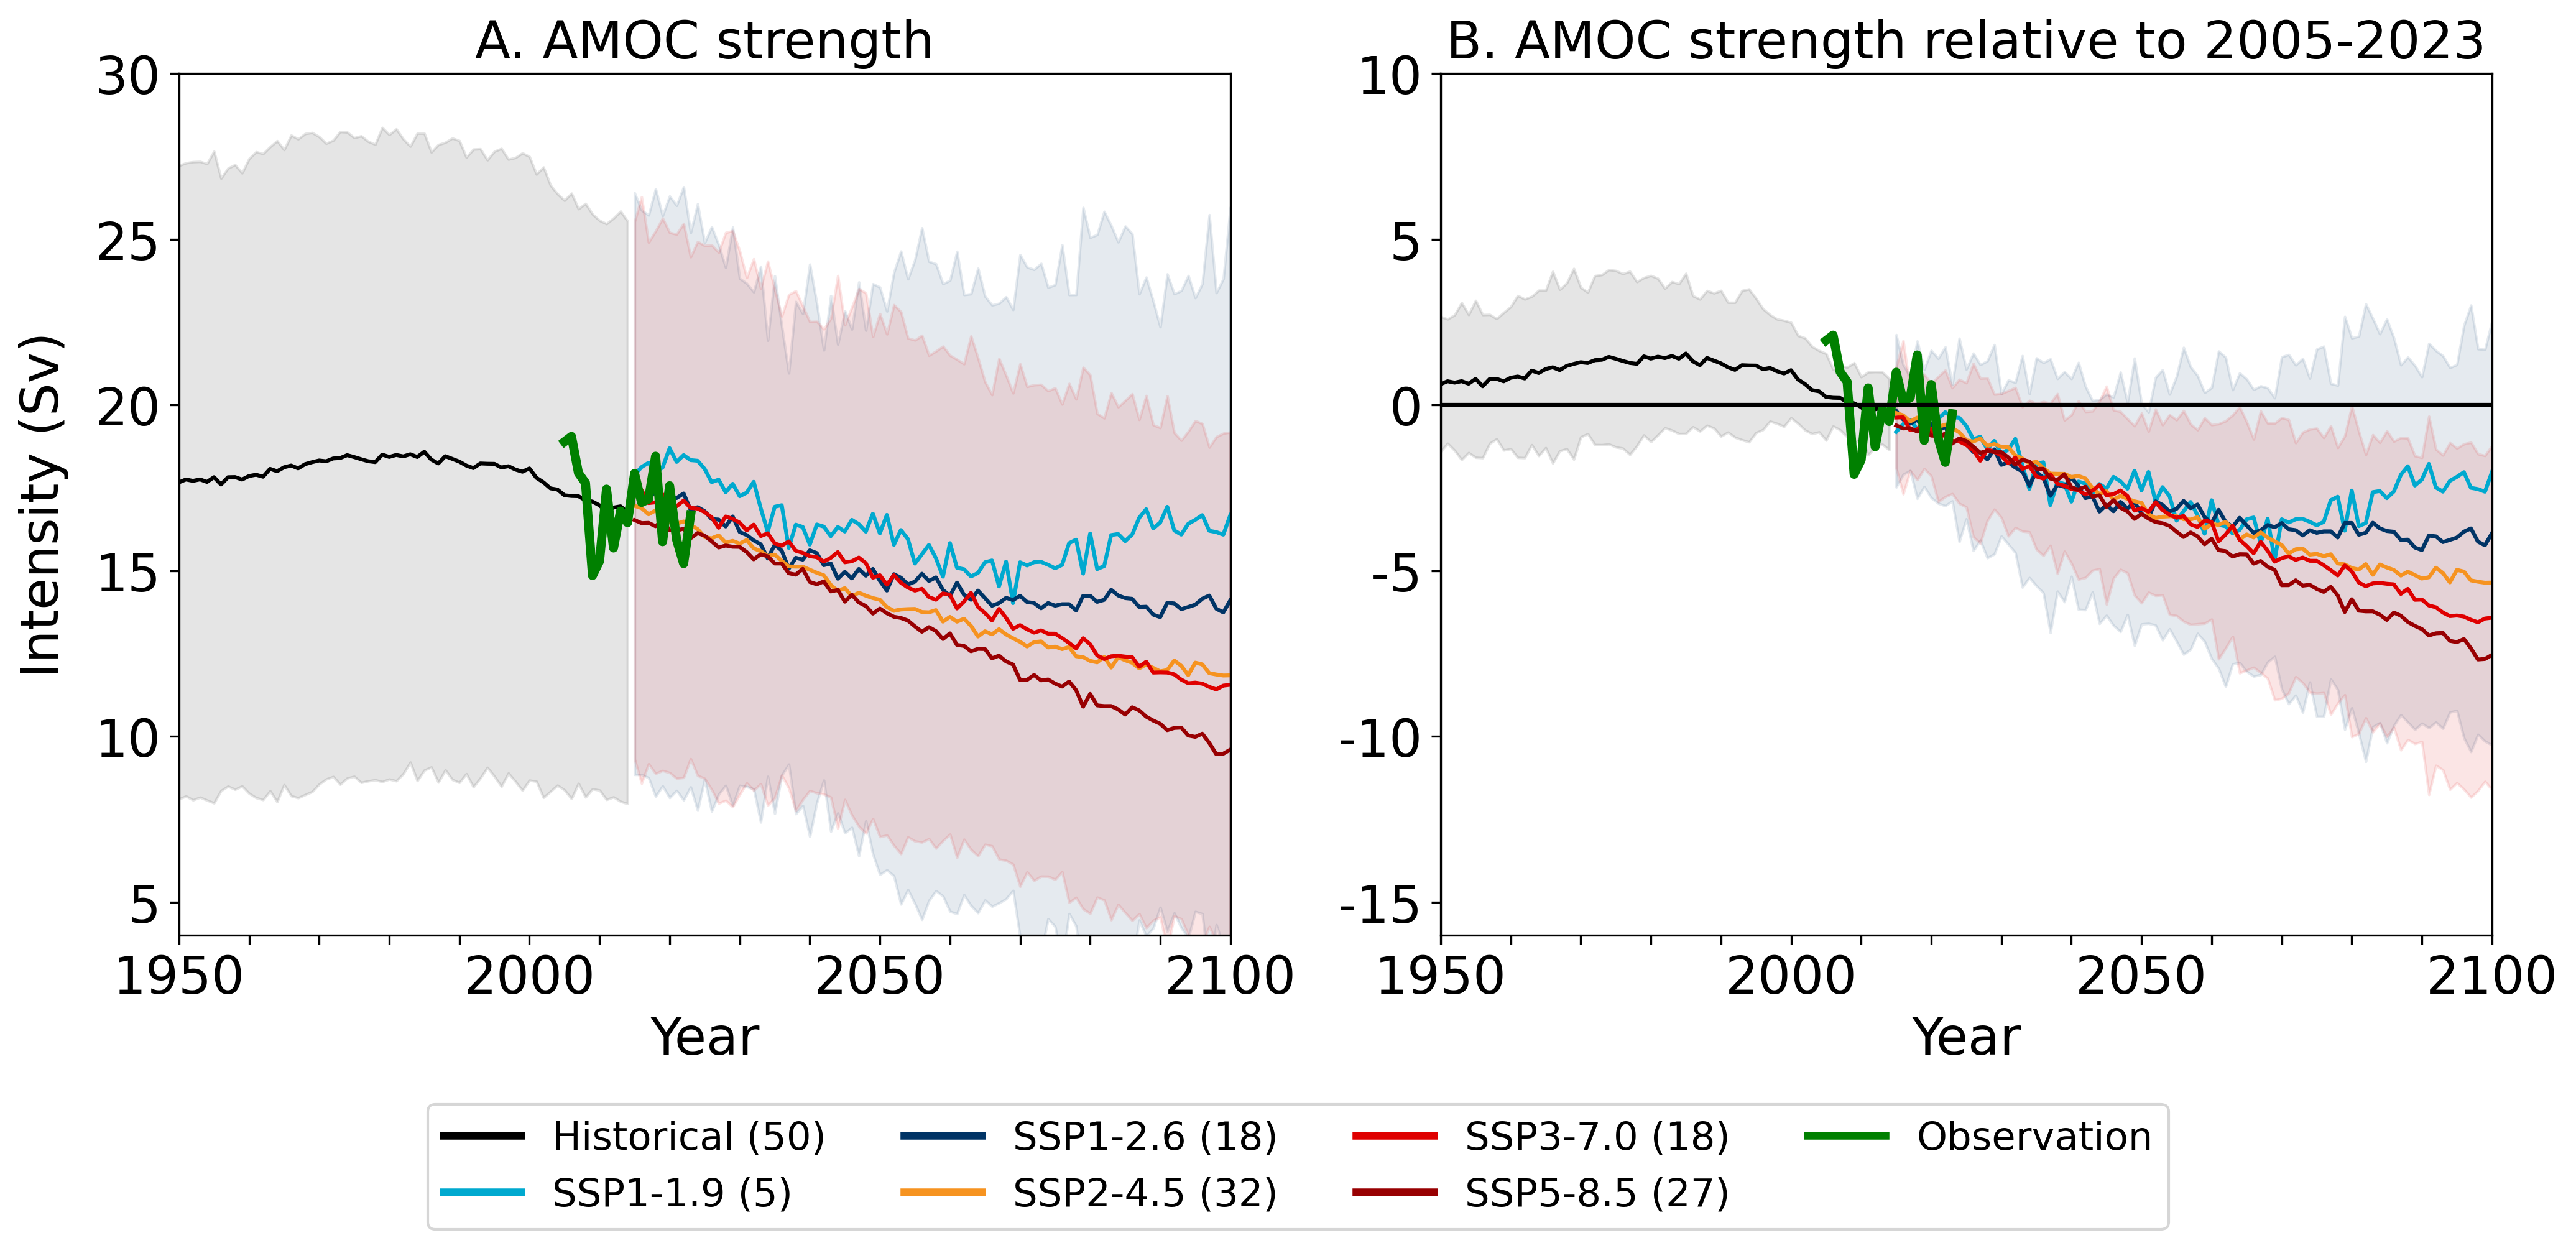

In [75]:
s = 80
fontsize = 20
fontsize_labels = 15

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(2*8,6), dpi=300)

#===================================================================================

# Ecarts types
ax1.fill_between(hist_times, hist_anomaly_down, hist_anomaly_up, alpha=0.1, color="black")
ax1.fill_between(ssp126_times, ssp126_anomaly_down, ssp126_anomaly_up, alpha=0.1, color="#003466")
ax1.fill_between(ssp370_times, ssp370_anomaly_down, ssp370_anomaly_up, alpha=0.1, color="#df0000")

# Moyennes
linehist,   = ax1.plot(hist_times, hist_AMOC_anomaly_mean, color="black", label="Historical ({})".format(len(hist_AMOC_averagedRun)))
linessp119, = ax1.plot(ssp119_times, ssp119_AMOC_anomaly_mean, color="#00a9cf", label="SSP1-1.9 ({})".format(len(ssp119_AMOC_anomaly)))
linessp126, = ax1.plot(ssp126_times, ssp126_AMOC_anomaly_mean, color="#003466", label="SSP1-2.6 ({})".format(len(ssp126_AMOC_anomaly)))
linessp245, = ax1.plot(ssp245_times, ssp245_AMOC_anomaly_mean, color="#f69320", label="SSP2-4.5 ({})".format(len(ssp245_AMOC_anomaly)))
linessp370, = ax1.plot(ssp370_times, ssp370_AMOC_anomaly_mean, color="#df0000", label="SSP3-7.0 ({})".format(len(ssp370_AMOC_anomaly)))
linessp585, = ax1.plot(ssp585_times, ssp585_AMOC_anomaly_mean, color="#980002", label="SSP5-8.5 ({})".format(len(ssp585_AMOC_anomaly)))
lineobs,    = ax1.plot(AMOC_obs_times, AMOC_obs_anomaly, label="Observation", color='green', linewidth=3.5)
#lines       = [lineobs, linehist, linessp119, linessp126, linessp245, linessp370, linessp585]

ax1.set_xticks(ticks=np.linspace(1950, 2100, 16), labels=list_labels)
ax1.set_xticklabels(list_labels, fontsize=fontsize)
ax1.set_xlim(1950, 2100)
ax1.axhline(y=0, color="black")
ax1.set_xlabel("Year", fontsize=fontsize)
#plt.ylabel("anomaly (Sv)\n(reference {}-{})".format(ref_min, ref_max), fontsize=fontsize)
ax1.set_title("B. AMOC strength relative to {}-{}".format(ref_min, ref_max), fontsize=fontsize)
#plt.suptitle("26°N Atlantic Meridional Overturning Circulation", fontsize=fontsize)
ticks = np.array([5,10,15,20,25,30])
ticks_bis = ticks -20
ax1.set_yticks(ticks=ticks_bis)
ax1.set_yticklabels(labels=ticks_bis, fontsize=fontsize)
ax1.set_ylim(ticks_bis[0]-1, ticks_bis[-1])



#plt.subplots_adjust(wspace=0.004)
#plt.tight_layout()


#===================================================================================

# Ecarts types
ax2.fill_between(hist_times, hist_down, hist_up, alpha=0.1, color="black")
ax2.fill_between(ssp126_times, ssp126_down, ssp126_up, alpha=0.1, color="#003466")
ax2.fill_between(ssp370_times, ssp370_down, ssp370_up, alpha=0.1, color="#df0000")

# Moyennes
ax2.plot(hist_times, hist_AMOC_mean, color="black", label="Historical      {}".format(len(hist_AMOC_averagedRun)))
ax2.plot(ssp119_times, ssp119_AMOC_mean, color="#00a9cf", label="SSP1-1.9    {}".format(len(ssp119_AMOC_anomaly)))
ax2.plot(ssp126_times, ssp126_AMOC_mean, color="#003466", label="SSP1-2.6    {}".format(len(ssp126_AMOC_anomaly)))
ax2.plot(ssp245_times, ssp245_AMOC_mean, color="#f69320", label="SSP2-4.5    {}".format(len(ssp245_AMOC_anomaly)))
ax2.plot(ssp370_times, ssp370_AMOC_mean, color="#df0000", label="SSP3-7.0    {}".format(len(ssp370_AMOC_anomaly)))
ax2.plot(ssp585_times, ssp585_AMOC_mean, color="#980002", label="SSP5-8.5    {}".format(len(ssp585_AMOC_anomaly)))
ax2.plot(AMOC_obs_times, AMOC_obs, label="Observation", color='green', linewidth=3.5)

#plt.legend(loc='lower left', fontsize=fontsize_labels)
ax2.set_xticks(ticks=np.linspace(1950, 2100, 16))
ax2.set_xticklabels(labels=list_labels, fontsize=fontsize)
ax2.set_xlim(1950, 2100)
#plt.axhline(y=0, color="black")
ax2.set_xlabel("Year", fontsize=fontsize)
ax2.set_title("A. AMOC strength".format(ref_min, ref_max), fontsize=fontsize)
ax2.set_ylabel("Intensity (Sv)", fontsize=fontsize, rotation=90, labelpad=10, loc='center')
#plt.title("Atlantic Meridional Overturning Circulation", fontsize=fontsize)
ax2.set_yticks(ticks=ticks)
ax2.set_yticklabels(labels=ticks, fontsize=fontsize)
ax2.set_ylim(ticks[0]-1, ticks[-1])


#plt.subplots_adjust(wspace=0.004)
#plt.tight_layout()

handles, labels = ax1.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='lower center', ncols=4, fontsize=fontsize_labels, bbox_to_anchor=(0.5,-0.17))
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)


plt.show()


In [52]:
# 2091–2100 average
def compute_long_term(scenar_times, scenar_AMOC_anomaly, long_min=2091, long_max=2100):
    scenar_times_int = scenar_times.astype('str').astype('int')
    scenar_times_times_ref = np.logical_and(scenar_times>=long_min, scenar_times<=long_max)
    scenar_AMOC_anomaly_long = nanaverage(scenar_AMOC_anomaly[:, scenar_times_times_ref], axis=1)
    return scenar_AMOC_anomaly_long

Y_ssp119_AMOC = compute_long_term(ssp119_times, ssp119_AMOC_averagedRun, long_min=2091, long_max=2100)
Y_ssp126_AMOC = compute_long_term(ssp126_times, ssp126_AMOC_averagedRun, long_min=2091, long_max=2100)
Y_ssp245_AMOC = compute_long_term(ssp245_times, ssp245_AMOC_averagedRun, long_min=2091, long_max=2100)
Y_ssp370_AMOC = compute_long_term(ssp370_times, ssp370_AMOC_averagedRun, long_min=2091, long_max=2100)
Y_ssp585_AMOC = compute_long_term(ssp585_times, ssp585_AMOC_averagedRun, long_min=2091, long_max=2100)


_, id_models_ssp119, id_models_hist_ssp119 = np.intersect1d(ssp119_unique_models, hist_unique_models, return_indices=True)
_, id_models_ssp126, id_models_hist_ssp126 = np.intersect1d(ssp126_unique_models, hist_unique_models, return_indices=True)
_, id_models_ssp245, id_models_hist_ssp245 = np.intersect1d(ssp245_unique_models, hist_unique_models, return_indices=True)
_, id_models_ssp370, id_models_hist_ssp370 = np.intersect1d(ssp370_unique_models, hist_unique_models, return_indices=True)
_, id_models_ssp585, id_models_hist_ssp585 = np.intersect1d(ssp585_unique_models, hist_unique_models, return_indices=True)

extended_ssp119_AMOC = np.concatenate((hist_AMOC_averagedRun[id_models_hist_ssp119], ssp119_AMOC_averagedRun[id_models_ssp119]), axis=1)
extended_ssp126_AMOC = np.concatenate((hist_AMOC_averagedRun[id_models_hist_ssp126], ssp126_AMOC_averagedRun[id_models_ssp126]), axis=1)
extended_ssp245_AMOC = np.concatenate((hist_AMOC_averagedRun[id_models_hist_ssp245], ssp245_AMOC_averagedRun[id_models_ssp245]), axis=1)
extended_ssp370_AMOC = np.concatenate((hist_AMOC_averagedRun[id_models_hist_ssp370], ssp370_AMOC_averagedRun[id_models_ssp370]), axis=1)
extended_ssp585_AMOC = np.concatenate((hist_AMOC_averagedRun[id_models_hist_ssp585], ssp585_AMOC_averagedRun[id_models_ssp585]), axis=1)
extended_times       = np.concatenate((hist_times, ssp119_times))

# ref between 1850-1900, or 2005-2023:
long_min, long_max = AMOC_obs_times[0], AMOC_obs_times[-1]
long_min, long_max = 1850, 1900

ref_ssp119_AMOC = np.mean(compute_long_term(extended_times, extended_ssp119_AMOC, long_min=long_min, long_max=long_max))
ref_ssp126_AMOC = np.mean(compute_long_term(extended_times, extended_ssp126_AMOC, long_min=long_min, long_max=long_max))
ref_ssp245_AMOC = np.mean(compute_long_term(extended_times, extended_ssp245_AMOC, long_min=long_min, long_max=long_max))
ref_ssp370_AMOC = np.mean(compute_long_term(extended_times, extended_ssp370_AMOC, long_min=long_min, long_max=long_max))
ref_ssp585_AMOC = np.mean(compute_long_term(extended_times, extended_ssp585_AMOC, long_min=long_min, long_max=long_max))
#ref_obs_AMOC    = np.mean(compute_long_term(AMOC_obs_times, AMOC_obs.reshape(1,-1), long_min=AMOC_obs_times[0], long_max=AMOC_obs_times[-1]))
err_ref_ssp119_AMOC = np.std(compute_long_term(extended_times, extended_ssp119_AMOC, long_min=long_min, long_max=long_max))
err_ref_ssp126_AMOC = np.std(compute_long_term(extended_times, extended_ssp126_AMOC, long_min=long_min, long_max=long_max))
err_ref_ssp245_AMOC = np.std(compute_long_term(extended_times, extended_ssp245_AMOC, long_min=long_min, long_max=long_max))
err_ref_ssp370_AMOC = np.std(compute_long_term(extended_times, extended_ssp370_AMOC, long_min=long_min, long_max=long_max))
err_ref_ssp585_AMOC = np.std(compute_long_term(extended_times, extended_ssp585_AMOC, long_min=long_min, long_max=long_max))


est_Y_ssp119_AMOC = np.mean(Y_ssp119_AMOC)
err_Y_ssp119_AMOC = np.std(Y_ssp119_AMOC)
est_Y_ssp126_AMOC = np.mean(Y_ssp126_AMOC)
err_Y_ssp126_AMOC = np.std(Y_ssp126_AMOC)
est_Y_ssp245_AMOC = np.mean(Y_ssp245_AMOC)
err_Y_ssp245_AMOC = np.std(Y_ssp245_AMOC)
est_Y_ssp370_AMOC = np.mean(Y_ssp370_AMOC)
err_Y_ssp370_AMOC = np.std(Y_ssp370_AMOC)
est_Y_ssp585_AMOC = np.mean(Y_ssp585_AMOC)
err_Y_ssp585_AMOC = np.std(Y_ssp585_AMOC)


est_Y_ssp119_AMOC_relative = (est_Y_ssp119_AMOC-ref_ssp119_AMOC)/ref_ssp119_AMOC
err_Y_ssp119_AMOC_relative = err_Y_ssp119_AMOC/ref_ssp119_AMOC
est_Y_ssp126_AMOC_relative = (est_Y_ssp126_AMOC-ref_ssp126_AMOC)/ref_ssp126_AMOC
err_Y_ssp126_AMOC_relative = err_Y_ssp126_AMOC/ref_ssp126_AMOC
est_Y_ssp245_AMOC_relative = (est_Y_ssp245_AMOC-ref_ssp245_AMOC)/ref_ssp245_AMOC
err_Y_ssp245_AMOC_relative = err_Y_ssp245_AMOC/ref_ssp245_AMOC
est_Y_ssp370_AMOC_relative = (est_Y_ssp370_AMOC-ref_ssp370_AMOC)/ref_ssp119_AMOC
err_Y_ssp370_AMOC_relative = err_Y_ssp370_AMOC/ref_ssp370_AMOC
est_Y_ssp585_AMOC_relative = (est_Y_ssp585_AMOC-ref_ssp585_AMOC)/ref_ssp585_AMOC
err_Y_ssp585_AMOC_relative = err_Y_ssp585_AMOC/ref_ssp585_AMOC







In [53]:
from scipy.stats import t
conf = 0.90 # 90% probability
z    = t.interval(conf, np.inf, loc=0, scale=1)[1]
z

1.6448536269514722

In [54]:

print("With a confidence of {} %\n".format(100*conf))

for scenario in ["ssp126", "ssp245", "ssp585"]:
    ref = globals()['ref_'+scenario +'_AMOC']
    err_ref = z*globals()['err_ref_'+scenario +'_AMOC']
    est = globals()['est_Y_'+scenario +'_AMOC']
    err = z*globals()['err_Y_'+scenario +'_AMOC']
    est_relative = globals()['est_Y_'+scenario +'_AMOC_relative']
    err_relative = z*globals()['err_Y_'+scenario +'_AMOC_relative']
    timeseries   = globals()['extended_'+scenario +'_AMOC']
    M = timeseries.shape[0]

    print("Scenario: {} ({}) {}-{} reference: {:.1f} +- {:.1f} Sv; 2091-2100 AMOC (Sv): {:.1f} +- {:.1f}; Diminution (%): {:.1f} +- {:.1f}".format(
        scenario, M, long_min, long_max, ref, err_ref, est, err, 100*est_relative, 100*err_relative))
    
    

With a confidence of 90.0 %

Scenario: ssp126 (18) 1850-1900 reference: 18.3 +- 7.6 Sv; 2091-2100 AMOC (Sv): 14.0 +- 8.2; Diminution (%): -23.4 +- 44.8
Scenario: ssp245 (32) 1850-1900 reference: 17.7 +- 6.6 Sv; 2091-2100 AMOC (Sv): 12.0 +- 6.5; Diminution (%): -32.0 +- 36.7
Scenario: ssp585 (27) 1850-1900 reference: 17.5 +- 6.7 Sv; 2091-2100 AMOC (Sv): 9.9 +- 6.0; Diminution (%): -43.4 +- 34.0
